# Iris 꽃받침 / 꽃잎 너비 예측 경진대회 (DACON)
붓꽃의 종류, 꽃받침, 꽃잎의 길이를 이용해 꽃받침의 너비와 꽃잎의 너비를 예측해보세요.

## 2. [EDA]

### (1) 데이터 및 통계량 확인

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

iris = pd.read_csv('iris_train.csv')
iris.head(10)

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2
5,5,virginica,6.5,5.8,3.0,2.2
6,6,setosa,4.3,1.1,3.0,0.1
7,7,versicolor,6.7,5.0,3.0,1.7
8,8,versicolor,6.8,4.8,2.8,1.4
9,9,versicolor,6.6,4.4,3.0,1.4


In [9]:
iris.info()
# 종 문자형인 것을 확인 -> species 특성 데이터형변환
# 75행. 6열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 75 non-null     int64  
 1   species            75 non-null     object 
 2   sepal length (cm)  75 non-null     float64
 3   petal length (cm)  75 non-null     float64
 4   sepal width (cm)   75 non-null     float64
 5   petal width (cm)   75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.6+ KB


In [19]:
iris.describe()
# 훈련데이터 모든 꽃받침의 평균 길이 :  6.044
# 훈련데이터 모든 꽃잎의 평균 길이 :  4.259

,id,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,37.000000,6.044000,4.258667,2.958667,1.384000
std,21.794495,0.842653,1.615390,0.388376,0.697106
min,0.000000,4.300000,1.100000,2.000000,0.100000
25%,18.500000,5.550000,3.750000,2.800000,1.000000
50%,37.000000,6.100000,4.700000,3.000000,1.500000
75%,55.500000,6.600000,5.300000,3.200000,1.850000
max,74.000000,7.700000,6.900000,4.000000,2.500000


In [35]:
iris[['sepal length (cm)','sepal width (cm)']].groupby(iris['species']).describe()
# setosa: 15개 데이터, versicolor, virginica : 30개 데이터

# 꽃받침 길이 : 평균의 경우 setosa가 두드러지게 작음, versicolor와 virginica는 비슷한 편, 
#                최대최소구간 봤을 때에도 setosa가 다른 종들에 비해 확연히 작아보임.

# 꽃받침 너비 : 최대최소구간 확인시 setosa : (2.9,4.0) // versicolor : (2.0,3.3) // virginica : (2.2,3.8)로
#               길이와 달리 setosa가 확연히 너비는 넓어보임.

sepal length (cm)                                                   \
                       count      mean       std  min    25%  50%    75%  max   
species                                                                         
setosa                  15.0  4.913333  0.397971  4.3  4.650  4.9  5.050  5.8   
versicolor              30.0  6.070000  0.545925  4.9  5.700  6.1  6.475  7.0   
virginica               30.0  6.583333  0.688869  4.9  6.225  6.5  7.175  7.7   

           sepal width (cm)                                                   
                      count      mean       std  min    25%   50%   75%  max  
species                                                                       
setosa                 15.0  3.346667  0.344065  2.9  3.050  3.40  3.55  4.0  
versicolor             30.0  2.790000  0.328371  2.0  2.625  2.85  3.00  3.3  
virginica              30.0  2.933333  0.334595  2.2  2.725  2.95  3.15  3.8

In [31]:
iris[['petal length (cm)','petal width (cm)']].groupby(iris['species']).describe()

# 꽃잎 길이 : 평균의 경우 setosa가 두드러지게 작음. 
#             최대최소구간 봤을 때에도 setosa가 다른 종들에 비해 확연히 작아보임. 
#             꽃받침과 달리 평균에서 종별로 유의미한 차이가 있어보임.

# 꽃잎 너비 : 최대최소구간 확인시 setosa : (0.1,0.4) // versicolor : (1.0,1.8) // virginica : (1.5,2.5)로
#             꽃받침과 달리 setosa가 확연히 꽃잎 너비가 좁아보임.

# 

petal length (cm)                                                 \
                       count      mean       std  min  25%  50%    75%  max   
species                                                                       
setosa                  15.0  1.420000  0.147358  1.1  1.4  1.4  1.500  1.7   
versicolor              30.0  4.333333  0.459635  3.3  4.0  4.5  4.700  5.0   
virginica               30.0  5.603333  0.626695  4.5  5.1  5.6  5.975  6.9   

           petal width (cm)                                                 
                      count      mean       std  min  25%  50%    75%  max  
species                                                                     
setosa                 15.0  0.200000  0.075593  0.1  0.2  0.2  0.200  0.4  
versicolor             30.0  1.353333  0.211291  1.0  1.3  1.4  1.500  1.8  
virginica              30.0  2.006667  0.255874  1.5  1.8  2.0  2.175  2.5

In [70]:
# 상관관계 분석
iris = iris.iloc[:,1:6]
iris1 = iris[iris.species=='setosa']
iris2 = iris[iris.species=='versicolor']
iris3 = iris[iris.species=='virginica']

In [71]:
# setosa의 특성간 상관관계
iris1.corr()

#  sepal length와 sepal width 간 상관관계가 매우 높음. (0.861071)
#  petal length와 petal width간 상관관계도 어느정도 있어보임. (0.512989)

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.214368,0.861071,0.332405
petal length (cm),0.214368,1.000000,0.219777,0.512989
sepal width (cm),0.861071,0.219777,1.000000,0.576726
petal width (cm),0.332405,0.512989,0.576726,1.000000


In [72]:
# versicolor의 특성간 상관관계
iris2.corr()

# sepal length와 petal length 간 상관관계가 높아보임. (0.769562)

# petal length와 petal width간 상관관계가 높아보임. (0.751556)
# sepal length와 sepal width 간 상관관계도 어느정도 있어보임 (0.569564)

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.769562,0.569564,0.495648
petal length (cm),0.769562,1.000000,0.564314,0.751556
sepal width (cm),0.569564,0.564314,1.000000,0.639143
petal width (cm),0.495648,0.751556,0.639143,1.000000


In [73]:
iris3.corr()
# petal length 와 sepal length의 상관관계 : 0.909107

# sepal length와 sepal width 간 상관관계 : 0.473749
# petal length와 petal width간 상관관계 : 0.386929

,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
sepal length (cm),1.000000,0.909107,0.473749,0.247149
petal length (cm),0.909107,1.000000,0.418791,0.386929
sepal width (cm),0.473749,0.418791,1.000000,0.549109
petal width (cm),0.247149,0.386929,0.549109,1.000000


### (2) 시각화 - 산점도를 통한 분포 확인

In [ ]:
virginica = iris[iris['species'] == 'virginica'] 
setosa = iris[iris['species'] == 'setosa'] 
versicolor = iris[iris['species'] == 'versicolor'] 

In [ ]:
# 종별 개수 확인 그래프
# import matplotlib.pyplot as plt # 그래프를 그리기위한 패키지 import
# import seaborn as sns # 그래프 패키지

# # plt.style.use('ggplot') #그래프를 R의 ggplot스타일로 출력해줍니다 순정 matplotlib보다 훨씬 깔끔합니다(?)
# plt.figure(figsize=(7, 7)) # 그래프의 사이즈를 설정해줍니다

# amount_of_virginica = len(virginica)
# amount_of_setosa = len(setosa)
# amount_of_versicolor = len(versicolor)

# species_count = [amount_of_virginica, amount_of_setosa, amount_of_versicolor]
# colors = sns.color_palette('hls',len(species_count))
# plt.bar(['virginica', 'setosa', 'versicolor'], species_count, color= colors)
# plt.tick_params(axis='x', labelsize=18)
# plt.tick_params(axis='y', labelsize=18)
# plt.title('Iris species count', fontsize=25)

# plt.show()

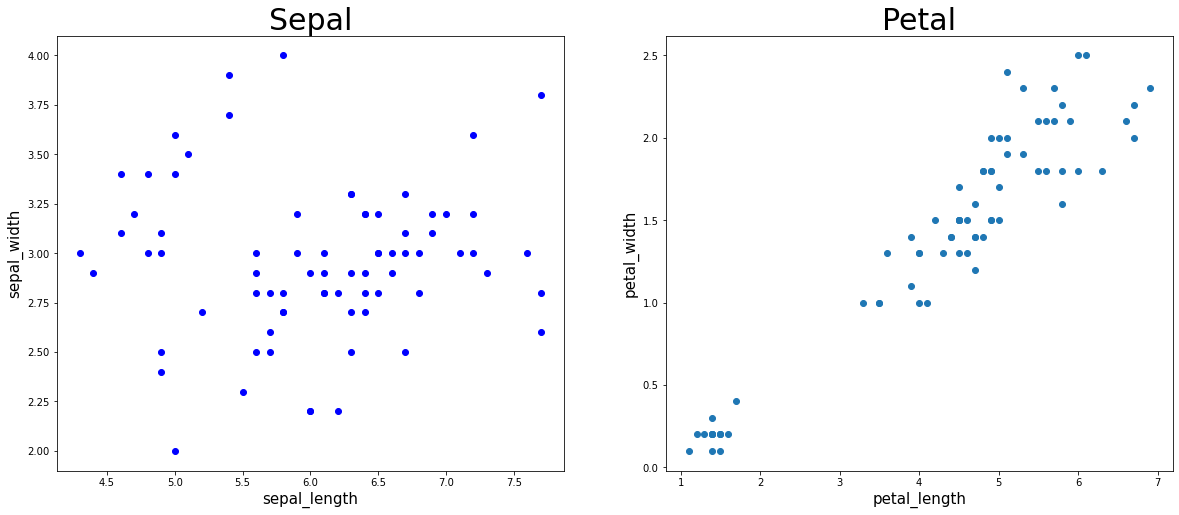

In [76]:
# sepal 길이, 너비간 산점도 & petal 길이, 너비간 산점도

sepal_length = iris['sepal length (cm)'] # 꽃받침 길이
petal_length = iris['petal length (cm)'] # 꽃잎의 길이
sepal_width = iris['sepal width (cm)'] # 꽃받침 너비
petal_width = iris['petal width (cm)'] # 꽃잎의 너비

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.scatter(sepal_length, sepal_width, color='b')
plt.xlabel('sepal_length', fontsize=15)
plt.ylabel('sepal_width', fontsize=15)
plt.title('Sepal', fontsize = 30)


plt.subplot(1,2,2)
plt.scatter(petal_length, petal_width)
plt.xlabel('petal_length', fontsize=15)
plt.ylabel('petal_width', fontsize=15)
plt.title('Petal', fontsize = 30)

plt.show()

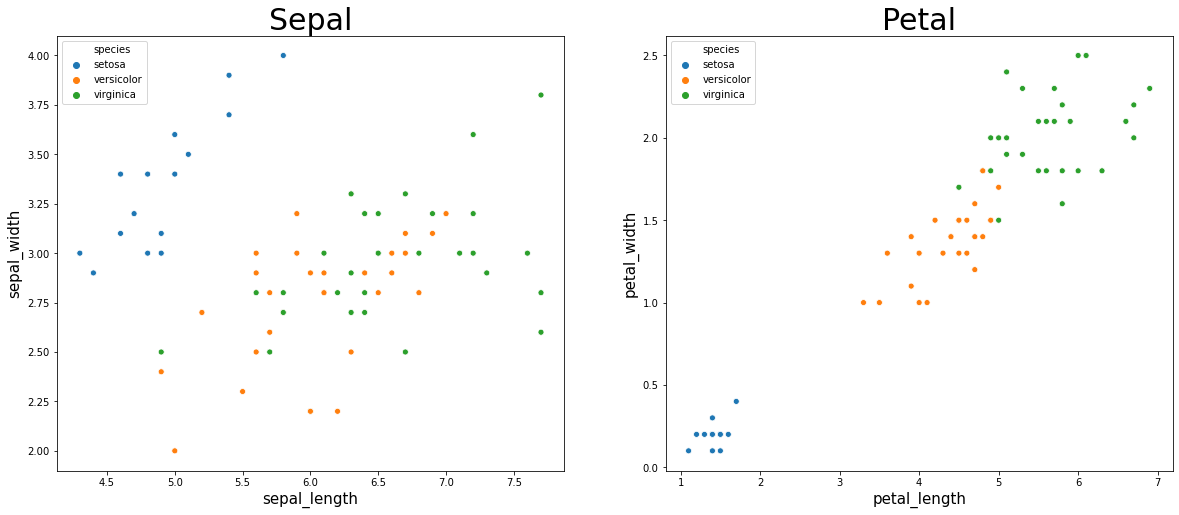

In [83]:

import seaborn as sns

plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.scatterplot(x = iris['sepal length (cm)'], 
                y =iris['sepal width (cm)'],
                hue = iris['species'],
                )

plt.xlabel('sepal_length', fontsize=15)
plt.ylabel('sepal_width', fontsize=15)
plt.title('Sepal', fontsize = 30)

# 화살표 
# plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (4.1, 3.0),
#             xy = (5.7, 4),
#             fontsize = 15,
#             arrowprops = {
#               'facecolor' : 'r', 
#               'edgecolor':'black', 
#               'headwidth' : 15,
#               'shrink': 1
#               }
#             )

# plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (4.7, 2.0),
#             xy = (6.5, 3.1),
#             fontsize = 15,
#             arrowprops = {
#               'facecolor' : 'b', 
#               'edgecolor':'black', 
#               'headwidth' : 15,
#               'shrink': 1
#               }
#             )

# plt.annotate(' ', ha = 'center', va = 'bottom', xytext = (6.3, 2.5),
#             xy = (7.5, 3.25),
#             fontsize = 15,
#             arrowprops =  {
#               'facecolor' : 'indigo', 
#               'edgecolor':'black', 
#               'headwidth' : 15,
#               'shrink': 1
#               }
#             )


plt.subplot(1,2,2)
sns.scatterplot(x = iris['petal length (cm)'], 
                y =iris['petal width (cm)'],
                hue = iris['species'],
                )
plt.xlabel('petal_length', fontsize=15)
plt.ylabel('petal_width', fontsize=15)
plt.title('Petal', fontsize = 30)

#원
# plt.gca().add_patch(plt.Circle((1.5, 0.25), .3, color = 'r', fill=False))
# plt.gca().add_patch(plt.Circle((4, 1.25), .7, color = 'b', fill=False))
# plt.gca().add_patch(plt.Circle((5.8, 2), 1, color = 'indigo', fill=False))

plt.show()



# 꽃받침과 꽃잎모두 길이에 따라 우상향 하는 모습이 보여짐.
## 꽃받침에서 setosa가 다른종과 확연히 구분되는 것으로 보여짐.         
## 꽃잎에서는 꽃받침에 비해 종별로 분포가 확실히 구분되는 모습이 보여짐. (파->노->초)

#### 시각화를 통해 도출한 결과로 어떤 모델을 사용할지 결정하기

기준 1. 데이터의 수  
기준 2. 선형성  
기준 3. 피처의 수  
기준 + ?!

- 회귀 (최근접,단순,릿지,라쏘,다항)
- 앙상블 (랜덤포레스트, 엑스트라 트리, 그래디언트 부스팅, 히스토그램기반 그래디언트부스팅, XGBoost, LightBgm)

-------------------------------------
알파로 규제강도 조절 - 과소적합 및 과대적합 방지
하이퍼파라미터 튜닝 (그리드서치,랜덤서치)



